In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from keras.preprocessing.text import text_to_word_sequence
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import Word

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Using TensorFlow backend.


**Read a file**

In [0]:
def readFile(fileName):
  # open the corpus file as read only
  # BOM byte order mark.
  file = open(fileName,'r',encoding="utf-8-sig")
  # read the corpus
  corpus = file.read().splitlines()

  # close the file
  file.close()   
  return corpus

In [0]:
text = readFile('microblog2011.txt')

**Message length distribution**

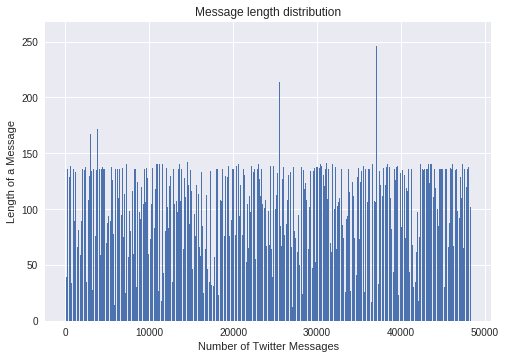

In [4]:
plt.bar(range(len(text)), [len(msg) for msg in text])
plt.ylabel('Length of a Message')
plt.xlabel('Number of Twitter Messages')
plt.title('Message length distribution')
plt.show();

**Average Words in a message**

In [5]:
numWords = [len(msg.split()) for msg in text]
print(np.median(numWords))
print(np.mean(numWords))

16.0
15.567981323471686


**Plot message length on box plot**

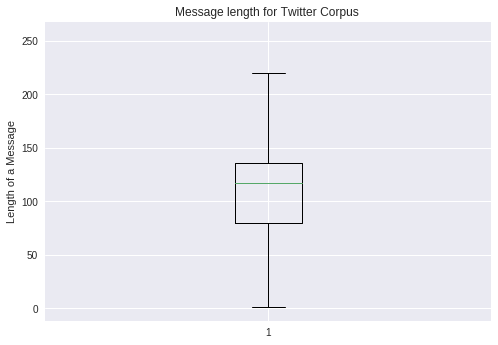

In [6]:
lenMsg = [len(msg) for msg in text]
# plot Message length
plt.boxplot(lenMsg)
plt.title('Message length for Twitter Corpus ')
plt.ylabel('Length of a Message')
plt.show()

**Preprocessing Dataset**

**Removing HTML tags**

In [0]:
from bs4 import BeautifulSoup
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

**Remove Numbers**

In [0]:
import re

def removeNumber(text):
    text = re.sub(r'\d+', '', text)
    return text


**Remove Escape Characters**

In [0]:
from bs4 import BeautifulSoup

def removeEscapeChar(text):
    text = BeautifulSoup(text, 'lxml').get_text()
    return text



**Contraction **

In [10]:
!pip install contractions
import contractions

In [0]:

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

**Lowercase**

In [0]:
def lower(text):
    return text.strip().lower()

**Remove URL**

In [0]:
def removeURL(text):
    return re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)

**Remove Twitter handles**

In [0]:
def removeUser(text):
    r = re.findall("@[\w]*", text)
    for i in r:
        text = re.sub(i, '', text)
    return text  
  


**Remove Re-tweets**

In [0]:
def removeRT(text):
  return ' '.join([word for word in text.split() if not word == 'rt'])  

**Cleaning of Tweets**

In [18]:
from textblob import TextBlob
for i,msg in enumerate(text):
    text[i] = denoise_text(msg)
    text[i] = removeNumber(text[i])
    text[i] = removeEscapeChar(text[i])
    text[i] = replace_contractions(text[i])
    text[i] = lower(text[i])
    text[i] = removeURL(text[i])
    text[i] = removeUser(text[i])
    text[i] = removeRT(text[i])
    


/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://warincontext.org/2011/02/08/muslim-brotherhood-rejects-khameneis-attempt-to-hijack-the-revolution/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://warincontext.org////muslim-brotherhood-rejects-khameneis-attempt-to-hijack-the-revolution/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://graphics8.nytimes.com/images/2011/02/01/world/americas/0202-for-web-MEXICO/0202-f

**Writing the preprocessed data into file**

In [0]:
with open('PreprocessedCorpus.txt', 'w') as f:
    for item in text:
        f.write("%s\n" % item)

**Reading Tokens from POS tagger**

In [0]:
posTagger = readFile('microblog2011_tokenized.txt')

In [0]:
for i,msg in enumerate(posTagger):
  posTagger[i] = msg.split("\t")[0]

**Forming Dictionary **

In [23]:
vocab = Counter()
vocab.update(posTagger)
del vocab['']
del vocab['rt']
print(vocab.items())

dict_items([('save', 299), ('bbc', 594), ('world', 1243), ('service', 789), ('from', 2461), ('savage', 9), ('cuts', 503), ('a', 10407), ('lot', 107), ('of', 10547), ('people', 1019), ('always', 198), ('make', 548), ('fun', 165), ('about', 1276), ('the', 21031), ('end', 295), ('but', 1272), ('question', 84), ('is', 8092), ('..', 1460), ('"', 5437), ('are', 3252), ('you', 5216), ('ready', 183), ('for', 7092), ('it', 3790), ('?..', 7), ('rethink', 4), ('group', 159), ('positive', 34), ('in', 10669), ('outlook', 30), (':', 23366), ('technology', 117), ('staffing', 17), ('specialist', 27), ('expects', 13), ('revenues', 5), ('to', 14344), ('be', 2259), ('“', 582), ('marg', 1), ('...', 12399), ("'", 3113), ('zombie', 12), ('fund', 52), ('manager', 137), ('phoenix', 23), ('appoints', 19), ('new', 2934), ('ceo', 44), ('buys', 10), ('up', 1363), ('funds', 35), ('that', 3021), ('have', 2228), ('been', 573), ('closed', 67), ('business', 445), ('and', 8349), ('latest', 222), ('::', 193), ('top', 48

**Tokens and there frequency**

In [0]:
with open('tokens.txt', 'w') as f:
    print(vocab, file=f)

**How many tokens did you find in the corpus?**

In [24]:
print(sum(vocab.values()))

812740


**How many types (unique tokens) did you have?**

In [25]:
print(len(list(vocab)))

63170


** For each token, print the token and its frequency in a file called Tokens.txt**

In [0]:
vocab.most_common()

**How many tokens appeared only once in the corpus?**

In [27]:
max_occurance = 1
only_once = [k for k,c in vocab.items() if c == max_occurance]
len(only_once)

37334

**Translating to English**

In [0]:
from textblob import TextBlob

def translate(text):
  for i,word in enumerate(text):
    if(len(word)>3):
      b = TextBlob(word)
      if b.detect_language() != 'en':
        text[i] =str(b.translate(from_lang=b.detect_language(), to='en'))
  return text

translate(posTagger)


**Removing Punctuations and Symbols from Tokens**

In [0]:
posTaggerWithoutSymbol = [word for word in posTagger if word.isalpha()]



**Removing stop words  from Tokens**

In [0]:
# filter out stop words
stopW = readFile('StopWords.txt')
stop_words = set(stopW)
preprocessedPOSTagger = [word for word in posTaggerWithoutSymbol if not word in stop_words]

In [38]:
vocabNew = Counter()
vocabNew.update(preprocessedPOSTagger)
del vocabNew['']
del vocabNew['rt']
print(vocabNew.items())

dict_items([('bbc', 594), ('world', 1243), ('service', 789), ('savage', 9), ('cuts', 503), ('lot', 107), ('people', 1019), ('fun', 165), ('question', 84), ('rethink', 4), ('group', 159), ('positive', 34), ('outlook', 30), ('technology', 117), ('staffing', 17), ('specialist', 27), ('expects', 13), ('revenues', 5), ('zombie', 12), ('fund', 52), ('manager', 137), ('phoenix', 23), ('appoints', 19), ('ceo', 44), ('buys', 10), ('funds', 35), ('closed', 67), ('business', 445), ('latest', 222), ('top', 480), ('releases', 109), ('cdt', 3), ('presents', 22), ('alice', 9), ('wonderland', 4), ('catonsville', 1), ('dinner', 64), ('posted', 93), ('territory', 6), ('location', 41), ('calgary', 12), ('alberta', 4), ('canada', 69), ('job', 712), ('category', 10), ('bu', 24), ('cud', 4), ('murder', 268), ('sum', 37), ('today', 890), ('flinch', 2), ('tht', 20), ('fukin', 5), ('angry', 56), ('news', 2134), ('free', 671), ('school', 237), ('funding', 45), ('plans', 190), ('lack', 27), ('transparency', 8), 

In [39]:
print(len(list(vocabNew)))
vocabNew.most_common()


47063


[('news', 2134),
 ('egyptian', 1825),
 ('state', 1750),
 ('egypt', 1547),
 ('super', 1379),
 ('obama', 1351),
 ('media', 1288),
 ('social', 1281),
 ('bowl', 1275),
 ('white', 1270),
 ('world', 1243),
 ('union', 1032),
 ('people', 1019),
 ('love', 978),
 ('airport', 974),
 ('security', 966),
 ('release', 946),
 ('president', 913),
 ('today', 890),
 ('law', 879),
 ('house', 868),
 ('protests', 815),
 ('service', 789),
 ('video', 779),
 ('lol', 764),
 ('says', 743),
 ('job', 712),
 ('police', 712),
 ('phone', 698),
 ('energy', 688),
 ('global', 678),
 ('back', 674),
 ('free', 671),
 ('taco', 663),
 ('dog', 655),
 ('protesters', 639),
 ('mubarak', 635),
 ('return', 623),
 ('cairo', 622),
 ('rite', 621),
 ('live', 618),
 ('bell', 613),
 ('yo', 599),
 ('know', 596),
 ('bbc', 594),
 ('special', 592),
 ('jobs', 583),
 ('think', 564),
 ('toyota', 557),
 ('ap', 547),
 ('court', 535),
 ('crash', 518),
 ('tv', 513),
 ('man', 507),
 ('watch', 506),
 ('cuts', 503),
 ('twitter', 501),
 ('budget', 497

**Bi Grams using Tokens **

In [41]:
import nltk

bigramUsingTokens = Counter()
bigramUsingTokens.update(nltk.bigrams(list(vocabNew)))

bigramUsingTokens.items()
bigramUsingTokens.most_common()
print(len(list(bigramUsingTokens)))


47062


In [42]:
bigramUsingTokens.most_common()


[(('bbc', 'world'), 1),
 (('world', 'service'), 1),
 (('service', 'savage'), 1),
 (('savage', 'cuts'), 1),
 (('cuts', 'lot'), 1),
 (('lot', 'people'), 1),
 (('people', 'fun'), 1),
 (('fun', 'question'), 1),
 (('question', 'rethink'), 1),
 (('rethink', 'group'), 1),
 (('group', 'positive'), 1),
 (('positive', 'outlook'), 1),
 (('outlook', 'technology'), 1),
 (('technology', 'staffing'), 1),
 (('staffing', 'specialist'), 1),
 (('specialist', 'expects'), 1),
 (('expects', 'revenues'), 1),
 (('revenues', 'zombie'), 1),
 (('zombie', 'fund'), 1),
 (('fund', 'manager'), 1),
 (('manager', 'phoenix'), 1),
 (('phoenix', 'appoints'), 1),
 (('appoints', 'ceo'), 1),
 (('ceo', 'buys'), 1),
 (('buys', 'funds'), 1),
 (('funds', 'closed'), 1),
 (('closed', 'business'), 1),
 (('business', 'latest'), 1),
 (('latest', 'top'), 1),
 (('top', 'releases'), 1),
 (('releases', 'cdt'), 1),
 (('cdt', 'presents'), 1),
 (('presents', 'alice'), 1),
 (('alice', 'wonderland'), 1),
 (('wonderland', 'catonsville'), 1),


**Removing Punctuations and Symbols from Corpus**

In [44]:
import string
translator=str.maketrans('','',string.punctuation)

text = readFile('PreprocessedCorpus.txt')
print(text[1])

for i,msg in enumerate(text):
  text[i] = text[i].translate(translator)


print(text[1])



a lot of people always make fun about the end of the world but the question is.."are you ready for it?..
a lot of people always make fun about the end of the world but the question isare you ready for it


**Removing stop words**

In [45]:
print(text[1])

stopW = readFile('StopWords.txt')
stop_words = set(stopW)
for i,msg in enumerate(text):
  text[i] = ' '.join([word for word in text[i].split() if word not in stop_words])


print(text[1])

a lot of people always make fun about the end of the world but the question isare you ready for it
lot people fun world question isare


**Bigrams using Corpus**

In [0]:
def bigramTweet(wholeCorpus):
  bigramUsingCorpus = Counter()
  for i,msg in enumerate(wholeCorpus):
    nltk_tokens = nltk.word_tokenize(msg)  
    bigramUsingCorpus.update(nltk.bigrams(nltk_tokens))
  return bigramUsingCorpus

In [48]:
import nltk
bigramUsingCorpus = bigramTweet(text)
bigramUsingCorpus.most_common()

[(('super', 'bowl'), 1183),
 (('social', 'media'), 972),
 (('state', 'union'), 918),
 (('’', 's'), 581),
 (('taco', 'bell'), 537),
 (('egypt', 'jan'), 364),
 (('white', 'house'), 357),
 (('union', 'address'), 355),
 (('global', 'warming'), 307),
 (('jan', 'egypt'), 288),
 (('keith', 'olbermann'), 239),
 (('bowl', 'xlv'), 210),
 (('president', 'obama'), 209),
 (('world', 'cup'), 204),
 (('white', 'stripes'), 196),
 (('moscow', 'airport'), 193),
 (('bbc', 'news'), 177),
 (('rahm', 'emanuel'), 176),
 (('united', 'states'), 173),
 (('barack', 'obama'), 166),
 (('health', 'care'), 158),
 (('egypt', 'protests'), 146),
 (('press', 'release'), 143),
 (('budget', 'cuts'), 142),
 (('customer', 'service'), 138),
 (('julian', 'assange'), 135),
 (('president', 'barack'), 133),
 (('hosni', 'mubarak'), 125),
 (('protests', 'egypt'), 124),
 (('tahrir', 'square'), 121),
 (('supreme', 'court'), 121),
 (('ap', 'ap'), 116),
 (('youtube', 'video'), 115),
 (('world', 'news'), 112),
 (('birth', 'certificate'

In [49]:
print(len(list(bigramUsingCorpus)))


252461


**Multi Word Expression**

In [50]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [0]:
multiwordExpression = Counter()
from textblob import TextBlob
for i,msg in enumerate(text):
    blob = TextBlob(msg)
    multiwordExpression.update(blob.noun_phrases)


In [52]:
multiwordExpression.most_common() 

[('social media', 350),
 ('super bowl', 290),
 ('white house', 161),
 ('taco bell', 108),
 ('white stripes', 104),
 ('state union', 93),
 ('state union address', 70),
 ('super bowl xlv', 63),
 ('keith olbermann', 60),
 ('rahm emanuel', 54),
 ('supreme court', 47),
 ('president obama', 39),
 ('global war online iphone click link', 38),
 ('egypt protests', 37),
 ('egypt jan', 31),
 ('current tv', 31),
 ('blog post', 30),
 ('warm weather', 27),
 ('becauseimblack rename', 27),
 ('julian assange', 26),
 ('mph kt humidity', 26),
 ('bbc world service', 25),
 ('jan egypt', 25),
 ('squad iphone ipod ipad', 25),
 ('global war gwo', 25),
 ('free shipping', 24),
 ('russian media', 24),
 ('federal judge', 23),
 ('protests egypt', 23),
 ('egyptian army', 22),
 ('mph kt pressure mb', 22),
 ('mph kt pressure', 22),
 ('prime minister', 21),
 ('youtube video', 20),
 ('tahrir square', 20),
 ('super bowl xlv badge', 20),
 ('cairo airport', 19),
 ('egyptian protests', 19),
 ('egyptian police', 19),
 ('glen

In [0]:
with open('Multiword Expressions.txt', 'w') as f:
    for item in list(multiwordExpression):
        f.write("%s\n" % item)

In [54]:
list(multiwordExpression)

['bbc world service',
 'savage cuts',
 'lot people fun world question isare',
 'rethink group',
 'positive outlook technology',
 'specialist rethink group',
 'revenues “ marg',
 'zombie fund manager phoenix appoints ceo phoenix',
 'top world releases',
 'alice wonderland catonsville dinner',
 'alice wonderland',
 'territory manager location calgary alberta canada job category bu jobs',
 'cud murder sum',
 'flinch tht fukin',
 'bbc news',
 'free school',
 'plans lack transparency …',
 'manchester city council details',
 'cuts plan',
 'top hardest',
 'professional global translation services',
 'fitness float',
 'full service model',
 'david cook mostest',
 'beautiful smile world',
 'piss cnt stand lick asses',
 'blue meanies cuts thebluemeanies',
 'como perde os dentes world warcraft alisson',
 'exciting hello',
 'valentines bouquets',
 'people bbm',
 'sam knw cricket fan',
 'world cup matches',
 'john baer',
 'midge rendell heck',
 'morning world',
 'admissions representative customer 